In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [19]:
df=pd.read_csv("./final_dataset.csv")
df

,n_beginner,n_intermediate,n_advance,accuracy_beginner,accuracy_intermediate,accuracy_advance,%_beginner,%_intermediate,%_advance,new_beginner,new_intermediate,new_advance
0,3,4,3,0.585567,0.716942,0.278396,-0.36,0.44,-0.60,2,7,1
1,2,0,8,0.578313,1.000000,0.061586,-0.36,0.75,-0.72,3,5,2
2,6,4,0,0.046100,0.707588,1.000000,-0.72,0.44,0.75,8,2,0
3,1,4,5,0.095613,0.667447,0.448442,-0.72,0.35,-0.48,1,6,3
4,7,1,2,0.669704,0.408965,0.747877,0.35,-0.48,0.44,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
100860,1,2,7,0.408739,0.592968,0.290533,-0.48,-0.36,-0.60,2,5,3
100861,7,3,0,0.688674,0.902457,1.000000,0.35,0.65,0.75,3,7,0
100862,0,1,9,1.000000,0.555652,0.784169,0.75,-0.36,0.44,0,0,10
100863,6,2,2,0.794666,0.639777,0.308068,0.44,0.35,-0.54,2,7,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84041 entries, 0 to 84040
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   n_beginner             84041 non-null  int64  
 1   n_intermediate         84041 non-null  int64  
 2   n_advance              84041 non-null  int64  
 3   accuracy_beginner      84041 non-null  float64
 4   accuracy_intermediate  84041 non-null  float64
 5   accuracy_advance       84041 non-null  float64
 6   %_beginner             84041 non-null  float64
 7   %_intermediate         84041 non-null  float64
 8   %_advance              84041 non-null  float64
 9   new_beginner           84041 non-null  int64  
 10  new_intermediate       84041 non-null  int64  
 11  new_advance            84041 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 7.7 MB


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [7]:
def showResults(y_true, y_pred, count = 10):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)

def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
      beP = y_pred[:,0],
      inP = y_pred[:,1],
      adP = y_pred[:,2],
      beg = y_pred[:,3],
      int = y_pred[:,4],
      adv = y_pred[:,5]
  ).head(count).to_markdown(index = False))

## ML Models

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [9]:
X=df.iloc[:,:6]
Y=df.iloc[:,6:]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape,X_test.shape)
print(Y_train.shape, Y_test.shape)

(67232, 6) (16809, 6)
(67232, 6) (16809, 6)


In [50]:
linear = LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression()

In [51]:
import pickle
with open('Linear_regression.pkl', 'wb') as f:
    pickle.dump(linear, f)

In [52]:
Y_pred=linear.predict(X_test)

In [12]:
def round_Y_pred(Y_pred):
    Y_pred_rounded = np.round(Y_pred[:, :3], 2)
    Y_pred_rounded = np.hstack((Y_pred_rounded, np.round(Y_pred[:, 3:], 0)))
    return Y_pred_rounded

In [54]:
Y_pred=round_Y_pred(Y_pred)

In [55]:
Y_pred

array([[-0.34, -0.77, -0.32,  5.  ,  2.  ,  3.  ],
       [ 0.19, -0.2 , -0.04,  3.  ,  4.  ,  3.  ],
       [ 0.67, -0.67, -0.5 ,  4.  ,  5.  ,  1.  ],
       ...,
       [ 0.34,  0.01,  0.04,  5.  ,  4.  ,  2.  ],
       [ 0.42,  0.22, -0.39,  2.  ,  5.  ,  3.  ],
       [ 0.58, -0.3 ,  0.61,  3.  ,  5.  ,  3.  ]])

In [56]:
y_pred=linear.predict(np.array([3,2,5,0.971983,0.203910,0.652418]).reshape(1,6))
y_pred=round_Y_pred(y_pred)
y_pred

array([[ 0.74, -0.64,  0.07,  3.  ,  3.  ,  4.  ]])

In [58]:
rdf = RandomForestRegressor()
rdf.fit(X_train,Y_train)

RandomForestRegressor()

In [59]:
import pickle
with open('Random_Forest.pkl', 'wb') as f:
    pickle.dump(rdf, f)

In [62]:
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,Y_train)

ExtraTreesRegressor()

In [63]:
import pickle
with open('ExtraTreesRegressor.pkl', 'wb') as f:
    pickle.dump(extra_reg, f)

In [66]:
knn = KNeighborsRegressor()
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [67]:
import pickle
with open('K_Nearest_Neighbors.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [70]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [71]:
import pickle
with open('Decision_tree.pkl', 'wb') as f:
    pickle.dump(dt, f)

In [50]:
def plot_performance(models, x_test, y_test):    
    X_test=x_test.values
    Y_test=y_test.values
    
    for name, model in models.items():
        print(f"Performance metrics for {name}:")
        y_pred = model.predict(X_test)
        y_pred=round_Y_pred(y_pred)
        showResults(y_test,y_pred)
        print("\n")
        plt.figure(figsize=(10, 4))
        
        for i in range(Y_test.shape[1]):
            plt.subplot(1, Y_test.shape[1], i+1)
            plt.scatter(Y_test[:, i], y_pred[:, i], alpha=0.5)
            plt.plot([min(Y_test[:, i]), max(Y_test[:, i])], [min(Y_test[:, i]), max(Y_test[:, i])], color='red', linestyle='--')
            plt.title(f'Output {i+1}')
            plt.xlabel('True Values')
            plt.ylabel('Predicted Values')
        
        plt.suptitle(f'Predicted vs Actual values for {name}')
        plt.tight_layout()
        plt.show()
        print("\n")

In [17]:
import pickle
with open("C:/Users/PC-ACER/DataScience/DataScienceProject/Linear_regression.pkl", 'rb') as f:
    Linear_regression = pickle.load(f)
with open("C:/Users/PC-ACER/DataScience/DataScienceProject/K_Nearest_Neighbors.pkl", 'rb') as f:
    K_Nearest_Neighbors = pickle.load(f)
with open("C:/Users/PC-ACER/DataScience/DataScienceProject/ExtraTreesRegressor.pkl", 'rb') as f:
    ExtraTreesRegressor = pickle.load(f)
with open("C:/Users/PC-ACER/DataScience/DataScienceProject/Decision_tree.pkl", 'rb') as f:
    Decision_tree = pickle.load(f)
with open("C:/Users/PC-ACER/DataScience/DataScienceProject/Random_Forest.pkl", 'rb') as f:
    Random_Forest = pickle.load(f)

In [26]:
model1 = {'Linear Regression': Linear_regression}

Performance metrics for Linear Regression:
R2 score:  0.6994400133784321
Mean squared error:  1.397297706585758
Mean absolute error:  0.675378170424572
Predictions: 
|   %_beginner |   %_intermediate |   %_advance |   new_beginner |   new_intermediate |   new_advance |   beP |   inP |   adP |   beg |   int |   adv |
|-------------:|-----------------:|------------:|---------------:|-------------------:|--------------:|------:|------:|------:|------:|------:|------:|
|        -0.54 |            -0.66 |       -0.48 |              5 |                  2 |             3 | -0.34 | -0.77 | -0.32 |     5 |     2 |     3 |
|         0.35 |            -0.44 |       -0.36 |              3 |                  4 |             3 |  0.19 | -0.2  | -0.04 |     3 |     4 |     3 |
|         0.65 |            -0.6  |       -0.6  |              4 |                  5 |             1 |  0.67 | -0.67 | -0.5  |     4 |     5 |     1 |
|         0.44 |            -0.72 |        0.44 |              3 |        

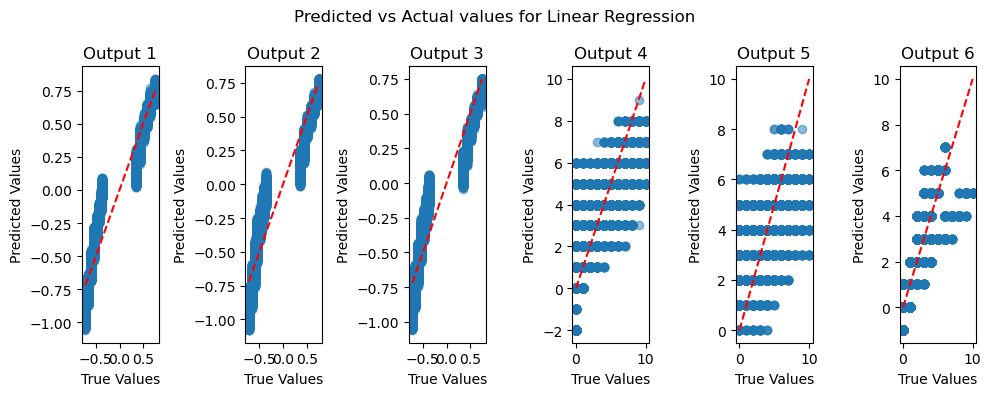

In [51]:
plot_performance(model1, X_test, Y_test)

In [52]:
model2 = {'Random Forest': Random_Forest}

Performance metrics for Random Forest:
R2 score:  0.9964855279963155
Mean squared error:  0.015271500386697591
Mean absolute error:  0.02049110595514313
Predictions: 
|   %_beginner |   %_intermediate |   %_advance |   new_beginner |   new_intermediate |   new_advance |   beP |   inP |   adP |   beg |   int |   adv |
|-------------:|-----------------:|------------:|---------------:|-------------------:|--------------:|------:|------:|------:|------:|------:|------:|
|        -0.54 |            -0.66 |       -0.48 |              5 |                  2 |             3 | -0.53 | -0.68 | -0.47 |     5 |     2 |     3 |
|         0.35 |            -0.44 |       -0.36 |              3 |                  4 |             3 |  0.36 | -0.44 | -0.36 |     3 |     4 |     3 |
|         0.65 |            -0.6  |       -0.6  |              4 |                  5 |             1 |  0.68 | -0.61 | -0.59 |     4 |     5 |     1 |
|         0.44 |            -0.72 |        0.44 |              3 |       

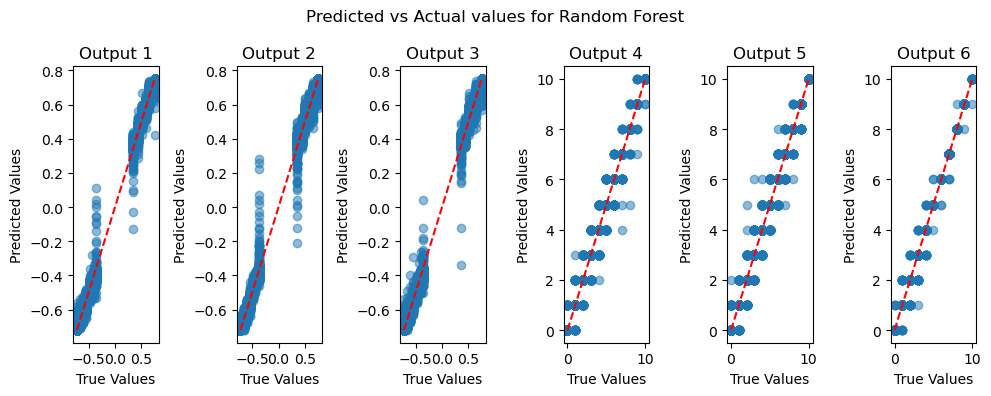

In [54]:
plot_performance(model2, X_test, Y_test)

In [32]:
model3 = {'Extra Trees': ExtraTreesRegressor}

Performance metrics for Extra Trees:
R2 score:  0.9931007607420138
Mean squared error:  0.026701580502508565
Mean absolute error:  0.03276300394629824
Predictions: 
|   %_beginner |   %_intermediate |   %_advance |   new_beginner |   new_intermediate |   new_advance |   beP |   inP |   adP |   beg |   int |   adv |
|-------------:|-----------------:|------------:|---------------:|-------------------:|--------------:|------:|------:|------:|------:|------:|------:|
|        -0.54 |            -0.66 |       -0.48 |              5 |                  2 |             3 | -0.52 | -0.68 | -0.49 |     5 |     3 |     3 |
|         0.35 |            -0.44 |       -0.36 |              3 |                  4 |             3 |  0.34 | -0.44 | -0.37 |     3 |     4 |     3 |
|         0.65 |            -0.6  |       -0.6  |              4 |                  5 |             1 |  0.69 | -0.6  | -0.59 |     4 |     5 |     1 |
|         0.44 |            -0.72 |        0.44 |              3 |         

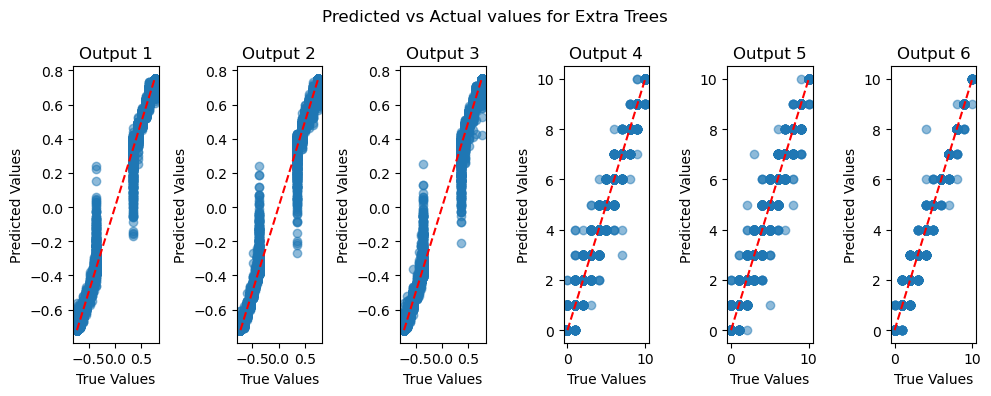

In [55]:
plot_performance(model3, X_test, Y_test)

In [34]:
model4 = {'KNN': K_Nearest_Neighbors}

Performance metrics for KNN:
R2 score:  0.9706061597181096
Mean squared error:  0.11565946020980838
Mean absolute error:  0.09776647430939663
Predictions: 
|   %_beginner |   %_intermediate |   %_advance |   new_beginner |   new_intermediate |   new_advance |   beP |   inP |   adP |   beg |   int |   adv |
|-------------:|-----------------:|------------:|---------------:|-------------------:|--------------:|------:|------:|------:|------:|------:|------:|
|        -0.54 |            -0.66 |       -0.48 |              5 |                  2 |             3 | -0.52 | -0.67 | -0.52 |     5 |     3 |     2 |
|         0.35 |            -0.44 |       -0.36 |              3 |                  4 |             3 |  0.24 | -0.43 | -0.37 |     3 |     4 |     3 |
|         0.65 |            -0.6  |       -0.6  |              4 |                  5 |             1 |  0.69 | -0.61 | -0.59 |     4 |     5 |     1 |
|         0.44 |            -0.72 |        0.44 |              3 |                  

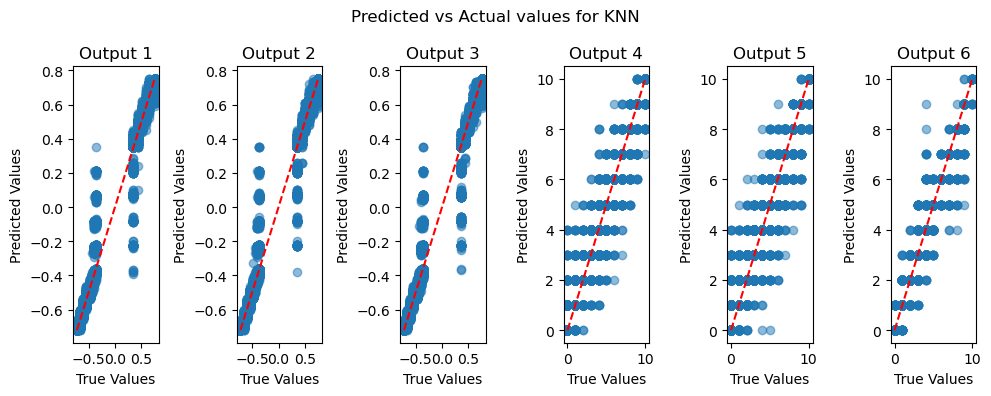

In [56]:
plot_performance(model4, X_test, Y_test)

In [36]:
model5 = {'Decision Tree': Decision_tree}

Performance metrics for Decision Tree:
R2 score:  0.9943913786956143
Mean squared error:  0.021444511868641783
Mean absolute error:  0.023785670374997517
Predictions: 
|   %_beginner |   %_intermediate |   %_advance |   new_beginner |   new_intermediate |   new_advance |   beP |   inP |   adP |   beg |   int |   adv |
|-------------:|-----------------:|------------:|---------------:|-------------------:|--------------:|------:|------:|------:|------:|------:|------:|
|        -0.54 |            -0.66 |       -0.48 |              5 |                  2 |             3 | -0.54 | -0.66 | -0.48 |     5 |     2 |     3 |
|         0.35 |            -0.44 |       -0.36 |              3 |                  4 |             3 |  0.35 | -0.44 | -0.36 |     3 |     4 |     3 |
|         0.65 |            -0.6  |       -0.6  |              4 |                  5 |             1 |  0.65 | -0.6  | -0.54 |     4 |     5 |     1 |
|         0.44 |            -0.72 |        0.44 |              3 |      

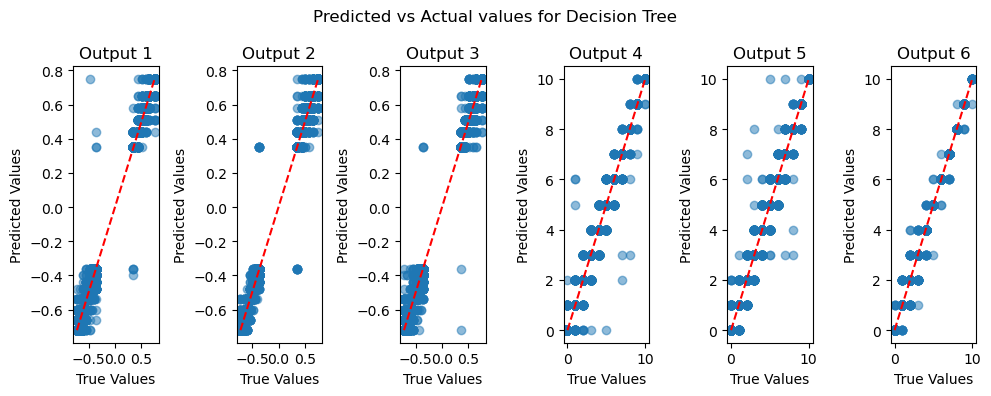

In [57]:
plot_performance(model5, X_test, Y_test)

### Here we can see Random Forest gives the best r2 score ie, 0.9964855279963155 so we will use Random Forest for prediction

## fetching question according to student performance

In [248]:

























.





























que_df=pd.read_csv("C:/Users/PC-ACER/DataScience/DataScienceProject/Questions.csv")
que_df

,question,cop,opa,opb,opc,opd,id,Difficulty
0,Chronic urethral obstruction due to benign pri...,3,Hyperplasia,Hyperophy,Atrophy,Dyplasia,e9ad821a-c438-4965-9f77-760819dfa155,0
1,Which vitamin is supplied from only animal sou...,3,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,2
2,All of the following are surgical options for ...,4,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,5c38bea6-787a-44a9-b2df-88f4218ab914,1
3,Following endaerectomy on the right common car...,1,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,cdeedb04-fbe9-432c-937c-d53ac24475de,0
4,Growth hormone has its effect on growth through?,2,Directly,IG1-1,Thyroxine,Intranuclear receptors,dc6794a3-b108-47c5-8b1b-3b4931577249,2
...,...,...,...,...,...,...,...,...
180061,Most common site for extra mammary Paget&;s di...,1,Vulva,Vagina,Penis,Anus,04519631-61e3-4ef4-b2d6-c352cf349ded,1
180062,Inferior Rib notching is seen in all except?,4,Coarctation of aoa,Classical blalock tausing operation,SVC obstruction,Neurofibromatosis,fa6b40a1-459a-401c-96e7-fac5608e7744,2
180063,Which is false regarding cryptococcus neoformans?,3,Grows at 5degC and 37degC,It has 4 serotypes,Urease negative,Causes superficial skin infection,4ecebffe-72f6-4988-8d64-738e43ad6086,2
180064,Histopathological finding of gluten hypersensi...,1,Crypt hyperplasia,Increase in thickness of the mucosa,Distal intestine involvement,Villous hypertrophy,7cf99676-f2b5-4f6d-9cf5-03ff7651afb3,1


In [249]:
que_df.isnull().sum()

question      0
cop           0
opa           0
opb           0
opc           0
opd           0
id            0
Difficulty    0
dtype: int64

In [250]:
que_df["SNo."]=range(1, len(que_df) + 1)
que_df

,question,cop,opa,opb,opc,opd,id,Difficulty,SNo.
0,Chronic urethral obstruction due to benign pri...,3,Hyperplasia,Hyperophy,Atrophy,Dyplasia,e9ad821a-c438-4965-9f77-760819dfa155,0,1
1,Which vitamin is supplied from only animal sou...,3,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,2,2
2,All of the following are surgical options for ...,4,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,5c38bea6-787a-44a9-b2df-88f4218ab914,1,3
3,Following endaerectomy on the right common car...,1,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,cdeedb04-fbe9-432c-937c-d53ac24475de,0,4
4,Growth hormone has its effect on growth through?,2,Directly,IG1-1,Thyroxine,Intranuclear receptors,dc6794a3-b108-47c5-8b1b-3b4931577249,2,5
...,...,...,...,...,...,...,...,...,...
180061,Most common site for extra mammary Paget&;s di...,1,Vulva,Vagina,Penis,Anus,04519631-61e3-4ef4-b2d6-c352cf349ded,1,180062
180062,Inferior Rib notching is seen in all except?,4,Coarctation of aoa,Classical blalock tausing operation,SVC obstruction,Neurofibromatosis,fa6b40a1-459a-401c-96e7-fac5608e7744,2,180063
180063,Which is false regarding cryptococcus neoformans?,3,Grows at 5degC and 37degC,It has 4 serotypes,Urease negative,Causes superficial skin infection,4ecebffe-72f6-4988-8d64-738e43ad6086,2,180064
180064,Histopathological finding of gluten hypersensi...,1,Crypt hyperplasia,Increase in thickness of the mucosa,Distal intestine involvement,Villous hypertrophy,7cf99676-f2b5-4f6d-9cf5-03ff7651afb3,1,180065


In [251]:
que_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180066 entries, 0 to 180065
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   question    180066 non-null  object
 1   cop         180066 non-null  int64 
 2   opa         180066 non-null  object
 3   opb         180066 non-null  object
 4   opc         180066 non-null  object
 5   opd         180066 non-null  object
 6   id          180066 non-null  object
 7   Difficulty  180066 non-null  int64 
 8   SNo.        180066 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.4+ MB


In [252]:
que_df.to_json('dataset.json', orient='records')

In [253]:
print(que_df.groupby("Difficulty").agg({"id":"count"}))

               id
Difficulty       
0           60367
1           59699
2           60000


In [254]:
beginner_rows = que_df[que_df['Difficulty'] == 0]
Sno_of_beginner_rows = beginner_rows['SNo.'].tolist()
print(len(Sno_of_beginner_rows))
print(Sno_of_beginner_rows)

60367
[1, 4, 7, 8, 11, 17, 25, 28, 29, 42, 43, 44, 46, 49, 51, 56, 58, 60, 61, 63, 65, 69, 72, 78, 80, 84, 89, 91, 92, 93, 96, 97, 99, 101, 102, 108, 111, 112, 116, 122, 135, 141, 143, 149, 150, 157, 159, 160, 161, 165, 169, 173, 177, 180, 182, 183, 184, 185, 186, 188, 190, 192, 193, 194, 198, 199, 203, 205, 210, 216, 217, 218, 219, 223, 226, 229, 231, 233, 234, 244, 245, 246, 248, 250, 255, 257, 259, 261, 262, 264, 265, 267, 271, 273, 277, 278, 289, 291, 293, 295, 296, 300, 305, 306, 307, 308, 312, 313, 316, 318, 323, 328, 330, 331, 333, 335, 340, 345, 346, 350, 353, 357, 358, 359, 363, 364, 365, 366, 371, 375, 381, 388, 391, 393, 398, 399, 400, 402, 403, 404, 406, 407, 408, 410, 412, 414, 416, 419, 425, 426, 427, 428, 429, 431, 433, 436, 437, 438, 440, 449, 453, 454, 455, 458, 460, 463, 467, 469, 472, 473, 474, 475, 478, 480, 481, 482, 485, 486, 487, 488, 489, 492, 495, 496, 497, 499, 502, 503, 504, 507, 510, 511, 516, 527, 529, 530, 537, 539, 540, 546, 547, 555, 558, 560, 562, 564, 

In [255]:
intermediate_rows = que_df[que_df['Difficulty'] == 1]
Sno_of_intermediate_rows = intermediate_rows['SNo.'].tolist()
print(len(Sno_of_intermediate_rows))
print(Sno_of_intermediate_rows)

59699
[3, 12, 14, 15, 18, 20, 21, 23, 24, 26, 27, 31, 32, 33, 36, 37, 38, 40, 45, 47, 48, 50, 52, 54, 57, 59, 64, 66, 68, 70, 71, 73, 74, 77, 85, 86, 87, 88, 90, 94, 98, 106, 109, 110, 115, 117, 118, 120, 124, 126, 127, 128, 131, 132, 133, 139, 140, 142, 148, 152, 153, 154, 156, 164, 168, 170, 172, 179, 187, 191, 195, 196, 197, 204, 206, 208, 211, 212, 213, 214, 215, 220, 221, 222, 225, 230, 232, 235, 237, 238, 240, 243, 247, 252, 256, 258, 260, 268, 269, 270, 272, 274, 275, 276, 279, 280, 281, 282, 283, 284, 285, 288, 292, 294, 297, 302, 303, 309, 311, 322, 324, 329, 332, 336, 337, 339, 343, 348, 349, 351, 354, 356, 360, 362, 367, 368, 370, 373, 376, 378, 379, 380, 383, 384, 386, 387, 389, 390, 392, 396, 405, 409, 413, 415, 417, 434, 439, 443, 448, 450, 451, 456, 457, 459, 462, 464, 466, 476, 479, 484, 490, 491, 493, 505, 506, 508, 509, 512, 513, 514, 515, 517, 519, 521, 522, 523, 528, 531, 532, 536, 538, 542, 544, 545, 549, 550, 551, 552, 553, 554, 557, 561, 574, 580, 581, 584, 586, 

In [256]:
advance_rows = que_df[que_df['Difficulty'] == 2]
Sno_of_advance_rows = advance_rows['SNo.'].tolist()
print(len(Sno_of_advance_rows))
print(Sno_of_advance_rows)

60000
[2, 5, 6, 9, 10, 13, 16, 19, 22, 30, 34, 35, 39, 41, 53, 55, 62, 67, 75, 76, 79, 81, 82, 83, 95, 100, 103, 104, 105, 107, 113, 114, 119, 121, 123, 125, 129, 130, 134, 136, 137, 138, 144, 145, 146, 147, 151, 155, 158, 162, 163, 166, 167, 171, 174, 175, 176, 178, 181, 189, 200, 201, 202, 207, 209, 224, 227, 228, 236, 239, 241, 242, 249, 251, 253, 254, 263, 266, 286, 287, 290, 298, 299, 301, 304, 310, 314, 315, 317, 319, 320, 321, 325, 326, 327, 334, 338, 341, 342, 344, 347, 352, 355, 361, 369, 372, 374, 377, 382, 385, 394, 395, 397, 401, 411, 418, 420, 421, 422, 423, 424, 430, 432, 435, 441, 442, 444, 445, 446, 447, 452, 461, 465, 468, 470, 471, 477, 483, 494, 498, 500, 501, 518, 520, 524, 525, 526, 533, 534, 535, 541, 543, 548, 556, 559, 563, 566, 567, 568, 570, 571, 572, 576, 578, 582, 583, 590, 591, 592, 594, 595, 603, 606, 609, 614, 616, 620, 621, 622, 627, 630, 634, 635, 637, 642, 643, 645, 652, 657, 662, 666, 668, 672, 677, 678, 680, 692, 694, 696, 701, 703, 704, 705, 708, 71

## PRE ASSESSMENT

### question	cop	opa	opb	opc	opd	id	Difficulty	SNo.

In [258]:
temp=que_df[que_df["Difficulty"]==0]
quiz=temp.head(10)
quiz.to_json('quiz.json', orient='records')
    

In [259]:
import random
correct_beg = 0
correct_int = 0
correct_adv = 0
n_beg=0
n_int=0
n_adv=0
total_questions = 5
u = input("Are you a new user? \n 1. y \n 2. n \n")
if u == 'y':
    new_user = True
else:
    new_user = False

if new_user:
    n_beg=10
    n_int=0
    n_adv=0
    print("Let's start your pre-assessment \n")
    for i in range(1,total_questions+1):
        num = random.choice(Sno_of_beginner_rows)
        print("Q",i,". ",que_df['question'][num-1], '\n')
        print("   Level : Beginner")
        print("   a. ",que_df['opa'][num-1], '\n')
        print("   b. ",que_df['opb'][num-1], '\n')
        print("   c. ",que_df['opc'][num-1], '\n')
        print("   d. ",que_df['opd'][num-1], '\n')
        ans = int(input("Enter answer option [1/2/3/4] : "))
        print("\n")
        if que_df['cop'][num-1]==ans:
            correct_beg+=1

if n_beg==0:
    beg_accuracy=1.0
else:
    beg_accuracy=(n_beg-correct_beg)/(n_beg)
if n_int==0:
    int_accuracy=1.0
else:
    int_accuracy=(n_int-correct_int)/(n_int)
if n_adv==0:
    adv_accuracy=1.0
else:
    adv_accuracy=(n_adv-correct_adv)/(n_adv)

print("\n")
print("Your Score Card For Pre - Assessment Quiz : \n")
print("Total Question :",total_questions)
print("Beginner : \n")
print("Total Beginner = ",n_beg," correct = ",correct_beg," Accuracy : ",beg_accuracy,"\n")
print("intermediate : \n")
print("Total intermediate = ",n_int," correct = ",correct_int," Accuracy : ",int_accuracy,"\n")
print("Advance : \n")
print("Total Advance = ",n_adv," correct = ",correct_adv," Accuracy : ",adv_accuracy,"\n")
print("\n")

import pickle
with open("C:/Users/PC-ACER/DataScience/DataScienceProject/Random_Forest.pkl", 'rb') as f:
    Random_Forest = pickle.load(f)


y_pred=model.predict(np.array([n_beg,n_int,n_adv,beg_accuracy,int_accuracy,adv_accuracy]).reshape(1,6))
y_pred=round_Y_pred(y_pred)
n_beg=int(y_pred[0][3])
n_int=int(y_pred[0][4])
n_adv=int(y_pred[0][5])

dict={
    "n_beg":n_beg,
    "n_int":n_int,
    "n_adv":n_adv
}

print("\n")
print("\n")
decide=input("Do You Want To Continue The Quiz Session [yes/no] :  \t")
count=1
while decide=="yes":
    print("\n")
    print("\n")
    print("\n")
    print("Let's take your quiz ",count," \n")
    index=1
    for key,value in dict.items():
        for j in range(0,value):
            if key=="n_beg":
                num = random.choice(Sno_of_beginner_rows)
            elif key=="n_int":
                num = random.choice(Sno_of_intermediate_rows)
            else:
                num = random.choice(Sno_of_advance_rows)

            print("Q",index,". ",que_df['question'][num-1], '\n')
            print("   Level : ",key)
            print("   a. ",que_df['opa'][num-1], '\n')
            print("   b. ",que_df['opb'][num-1], '\n')
            print("   c. ",que_df['opc'][num-1], '\n')
            print("   d. ",que_df['opd'][num-1], '\n')
            index+=1
            ans = int(input("Enter answer option [1/2/3/4] : "))
            print("\n")
            if ans == que_df['cop'][num-1]:
                if key=="n_beg":
                    correct_beg+=1
                elif key=="n_int":
                    correct_int+=1
                else:
                    correct_adv+=1


    if n_beg==0:
        beg_accuracy=1.0
    else:
        beg_accuracy=(n_beg-correct_beg)/(n_beg)
    if n_int==0:
        int_accuracy=1.0
    else:
        int_accuracy=(n_int-correct_int)/(n_int)
    if n_adv==0:
        adv_accuracy=1.0
    else:
        adv_accuracy=(n_adv-correct_adv)/(n_adv)
    print("\n")
    print("Your Score Card For Quiz ",count," : \n")
    print("Total Question :",total_questions)
    print("Beginner : \n")
    print("Total Beginner = ",n_beg," correct = ",correct_beg," Accuracy : ",beg_accuracy,"\n")
    print("intermediate : \n")
    print("Total intermediate = ",n_int," correct = ",correct_int," Accuracy : ",int_accuracy,"\n")
    print("Advance : \n")
    print("Total Advance = ",n_adv," correct = ",correct_adv," Accuracy : ",adv_accuracy,"\n")
    print("\n")
    y_pred=model.predict(np.array([n_beg,n_int,n_adv,beg_accuracy,int_accuracy,adv_accuracy]).reshape(1,6))
    y_pred=round_Y_pred(y_pred)
    n_beg=int(y_pred[0][3])
    n_int=int(y_pred[0][4])
    n_adv=int(y_pred[0][5])
    dict={
    "n_beg":n_beg,
    "n_int":n_int,
    "n_adv":n_adv
    }
    count+=1
    print("\n")
    print("\n")
    print("\n")
    decide=input("Do You Want To Continue The Quiz Session [yes/no] :  \t")
                    
                

KeyboardInterrupt: Interrupted by user